# Yandex Cup 2020 - Аналитика

### Задача 1

A. Посчитать лгунов в стране
В государстве живёт 10 000 человек. Они делятся на правдолюбов и лгунов. Правдолюбы говорят правду с вероятностью 80%, а лгуны — с вероятностью 40%. Государство решило подсчитать правдолюбов и лгунов на основе опроса 100 жителей. Каждый раз случайно выбранного человека спрашивают: «Вы лгун?» — и записывают ответ. Однако один человек может поучаствовать в опросе несколько раз. Если житель уже участвовал в опросе — он отвечает то же самое, что и в первый раз. Мы знаем, что правдолюбов 70%, а лгунов 30%. Какая вероятность того, что государство недооценит количество лгунов, т. е. опрос покажет, что лгунов меньше 30%? Дайте ответ в процентах с точкой в качестве разделителя, результат округлите до сотых (пример ввода: 00.00).

### Решение

Лгуны говорят правду с вероятностью 40%, правдолюбы - 80%. Матожидание количества правдолюбов и лгунов в выборке составит 70 и 30 человек. Из 70 правдолюбов $70 \times 80% = 56$ человек скажет, что они правдолюбы, а оставшиеся 14, что они лгуны. Из 30 лгунов 60%, то есть 18, скажет, что они правдолюбы, а 12, что они лгуны. В итоге по результатам опроса получится, что 74 человека - правдолюбы, а 26 - лгуны. Таким образом получим, что вероятность получить ответ лгун в каждом конкретном случае 0,26.

Задача сводится к тому, чтобы найти вероятность того, что при 100 испытаниях количество лгунов окажется меньше 30%. Распределение количества «успехов» в последовательности из $n$ независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна $p$ называется биномиальным распределением.

In [4]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

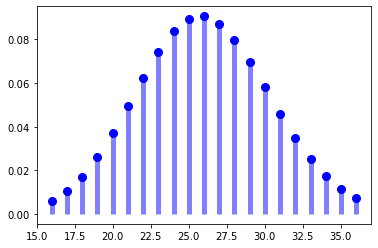

In [16]:
fig, ax = plt.subplots(1, 1)
n, p = 100, 0.26
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);

In [31]:
prob = binom.cdf(29, n, p)*100
print('Решение {}'.format(round(prob,2)))

Решение 78.95


## Задача Б - Театральный сезон и телефоны

Международный сервис по продаже билетов решил подвести итоги театрального сезона. В качестве одной из метрик руководитель проекта хочет посчитать количество пользователей, которые покупали билеты на разные спектакли.
При покупке билета пользователь указывает номер своего телефона. Необходимо найти спектакль с наибольшим числом уникальных телефонных номеров. И посчитать количество соответствующих уникальных телефонных номеров.
Зарегистрироваться на направление Аналитика и другие треки чемпионата вы можете на сайте Yandex Cup.

### Формат ввода
Логи покупок доступны в файле ticket_logs.csv. В первом столбце название спектакля из базы сервиса. Во втором - номер телефона, который оставил пользователь при покупке. Отметим, что в целях конспирации телефонные коды стран заменены на необслуживаемые в настоящий момент зоны.

### Формат вывода
Число уникальных номеров.

### Решение

In [15]:
import pandas as pd

In [36]:
tickets = pd.read_csv('ticket_logs.csv',header=None)
tickets.columns = ['perf', 'num']
tickets.head()

,perf,num
0,Кошки,+88029264576
1,Норма,8805-630-71-19
2,Евгений Онегин,8-(802)-235-30-28
3,Вестсайдская история,8-803-151-78-95
4,Дон Кихот,8-802-311-48-72


In [37]:
import re

In [38]:
pattern = '\D'
tickets.num = tickets.num.apply(lambda x: re.sub(pattern, r'', x))
tickets.head()

,perf,num
0,Кошки,88029264576
1,Норма,88056307119
2,Евгений Онегин,88022353028
3,Вестсайдская история,88031517895
4,Дон Кихот,88023114872


In [54]:
tickets = tickets.drop_duplicates()
display(tickets.groupby(by='perf').count().sort_values(by='num', ascending=False).head())

,num
perf,
Кошки,181
Спящая красавица,175
Дон Кихот,175
Кармен,171
Лебединое озеро,171


# Задача C. Рассчитать pFound
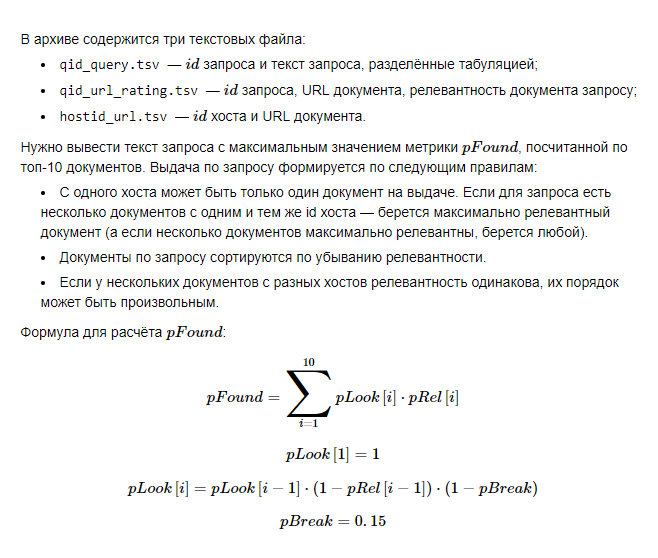

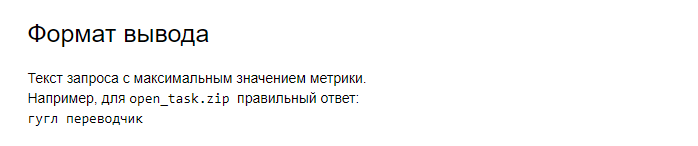

In [1]:
import zipfile

In [8]:
z = zipfile.ZipFile('data.zip', 'r')
z

<zipfile.ZipFile filename='data.zip' mode='r'>

In [10]:
z.printdir()

File Name                                             Modified             Size
hidden_task.zip                                2020-05-20 22:45:10        35607
open_task.zip                                  2019-05-30 11:09:26        39715


In [11]:
z.extractall()

In [13]:
z.close()

In [119]:
qid_query = pd.read_csv('hidden_task/qid_query.tsv', sep = '\t', header=None)
qid_query.columns = ['id', 'text']
qid_query.head()

,id,text
0,402111,работа фотографом в австралии
1,405851,производительность видеокарт
2,407522,ёлочные игрушки из пластиковых бутылок
3,409073,туту
4,438518,характеристика стрельцов


In [120]:
qid_url_rating = pd.read_csv('hidden_task/qid_url_rating.tsv', sep = '\t', header=None)
qid_url_rating.columns = ['id', 'url', 'rel']
qid_url_rating.head()

,id,url,rel
0,402111,http://24-job.com/board/job_australia/232-1-2-...,0.07
1,402111,http://24-job.com/board/job_australia/232-1-2-...,0.07
2,402111,http://802351.info/5964-v-avstralii.html,0.00
3,402111,http://auscommunity.com/blog/jobs/,0.00
4,402111,http://auscommunity.com/tag/%D1%84%D0%BE%D1%82...,0.00


In [121]:
hostid_url = pd.read_csv('hidden_task/hostid_url.tsv', sep = '\t', header=None)
hostid_url.columns = ['host_id', 'url']
hostid_url.head()

,host_id,url
0,1,http://09spravki.ru/requisites.php
1,10,http://3pu.info/seo-tools/domains
2,1006,http://www.priroda.su/item/820
3,1007,http://www.prisnilos.su/znaki_zodiaka/strelets...
4,1009,http://www.prohotel.ru/hotel-108042/0/


In [122]:
data = qid_query.merge(qid_url_rating).merge(hostid_url)
data

,id,text,url,rel,host_id
0,402111,работа фотографом в австралии,http://24-job.com/board/job_australia/232-1-2-...,0.07,7
1,402111,работа фотографом в австралии,http://24-job.com/board/job_australia/232-1-2-...,0.07,7
2,402111,работа фотографом в австралии,http://802351.info/5964-v-avstralii.html,0.00,13
3,402111,работа фотографом в австралии,http://auscommunity.com/blog/jobs/,0.00,53
4,402111,работа фотографом в австралии,http://auscommunity.com/tag/%D1%84%D0%BE%D1%82...,0.00,53
...,...,...,...,...,...
798,99543,"КВН ""Утомленные солнцем""",http://www.youtube.com/watch?v=QDcomRWogFE,0.14,1155
799,99543,"КВН ""Утомленные солнцем""",http://www.youtube.com/watch?v=Y3n47xZb0b4,0.14,1155
800,99543,"КВН ""Утомленные солнцем""",http://www.yuga.ru/articles/culture?id=3378,0.00,1156
801,99543,"КВН ""Утомленные солнцем""",http://www.zexe.de/modules.php?name=Pages&pa=s...,0.14,1160


In [123]:
data = data.sort_values(by='rel', ascending=False)
data = data.drop_duplicates(subset=['id', 'host_id'])
data

,id,text,url,rel,host_id
142,409073,туту,http://www.tutu.ru/,0.61,1101
510,690263,avz как пользоваться,http://z-oleg.com/secur/avz_doc/,0.61,1180
561,692308,бесплатный просмотр камеди клаб,http://www.rucomedy.com/,0.61,1035
776,99543,"КВН ""Утомленные солнцем""",http://us-kvn.narod.ru/,0.61,594
681,79514,"Гостиница Polaris, Сургут",http://www.hotelpolaris.ru/,0.61,837
...,...,...,...,...,...
297,5308,home нет доменов,http://3pu.info/seo-tools/domains,0.00,10
296,49587,IL2 точность стрельбы,http://www.youtube.com/watch?v=8bPIaqdE6s4,0.00,1155
295,49587,IL2 точность стрельбы,http://www.xliby.ru/transport_i_aviacija/tehni...,0.00,1152
290,49587,IL2 точность стрельбы,http://www.runshoot.ru/statistics_shooting_acc...,0.00,1038


In [124]:
qid_query['pfound'] = 0
pbreak = 0.15
for qindex, qrow in qid_query.iterrows():
    pfound = 0
    plook = []
    prel = []
    i = 0
    for dindex, drow in data[data.id == qrow[0]].head(10).iterrows():
        prel.append(drow[3])
        if i == 0:
            plook.append(1)
        else:
            plook.append(plook[i-1]*(1-prel[i-1])*(1-pbreak))
        pfound += plook[i] * prel[i]
        i += 1
    qid_query.loc[qindex,'pfound'] = pfound

In [125]:
qid_query = qid_query.sort_values(by='pfound', ascending=False)
qid_query.head()

,id,text,pfound
14,692308,бесплатный просмотр камеди клаб,0.852628
3,409073,туту,0.808643
19,99543,"КВН ""Утомленные солнцем""",0.772245
12,690263,avz как пользоваться,0.770353
17,79514,"Гостиница Polaris, Сургут",0.764755


In [126]:
display(qid_query[qid_query.pfound == qid_query.pfound.max()])

,id,text,pfound
14,692308,бесплатный просмотр камеди клаб,0.852628


# D. Спортивный турнир
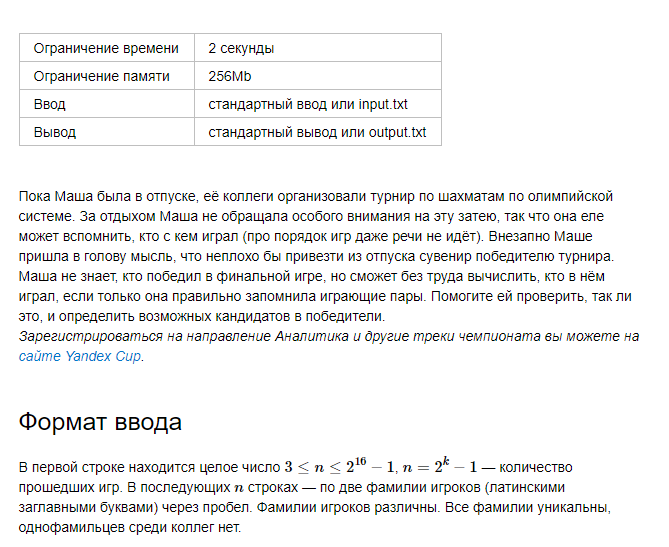

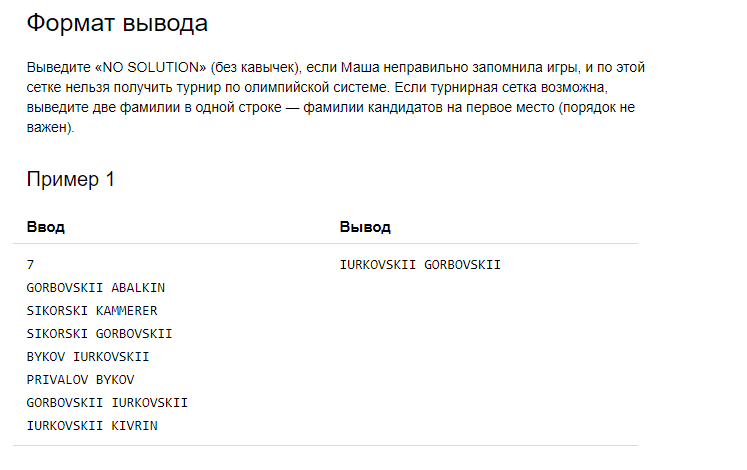

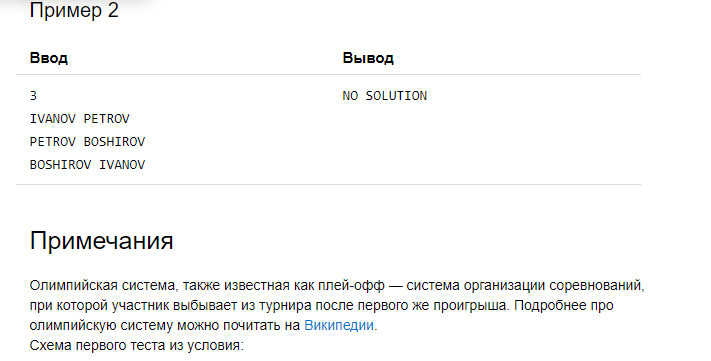

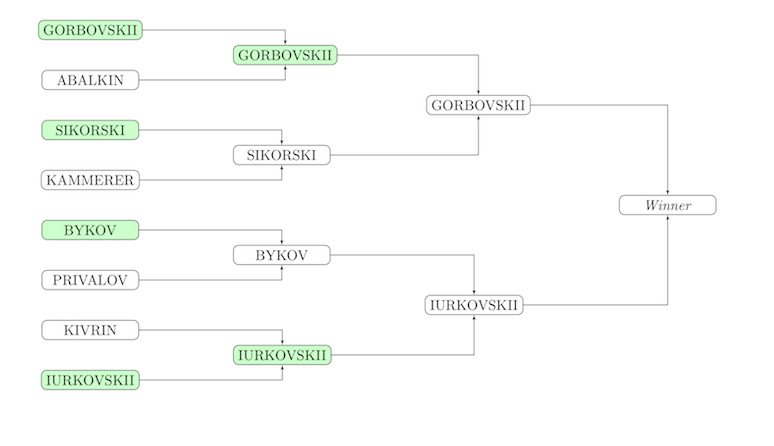

In [ ]:
import math
import collections
import pandas as pd

inp = pd.read_csv('input_1.txt', header=None)
n = int(inp.iloc[0,0])
games = inp.iloc[1:,0]

#Вычислим количество туров
lap = int(math.log2(n+1))

# Составим список игроков
gamers = []
for row in games:
    for gamer in row.split(' '):
        if gamer not in gamers:
            gamers.append(gamer)

# Найдём количество игр для каждого игрока
players = dict(collections.Counter(games.str.split(' ').sum()))
players = pd.DataFrame.from_dict(players, orient='index', columns=['games'])
players.games = players.games.apply(lambda x: int(x))

# Проверим, возможно ли такое распределение игр
for i in range(1,lap+1):
    if i != lap:
        left = players[players.games == i].games.count()
    else:
        left = int(players[players.games == i].games.count()/2)
    if left != 2**(lap-i):
        res = 'NO SOLUTION'
        break
    else:
        if  i == lap:
            winners = list(players[players.games == players.games.max()].index)
            res = winners[0]+' '+ winners[1]
file = open("output.txt", "w")
file.write(res)
file.close()

In [337]:
import math
import collections

file = open("input_2.txt", "r")

games = []
for it, line in enumerate(file):
    line = line.strip()
    if not line:
        continue
    if it == 0:
        n = int(line)
    else:
        games.append(line.split())

# Вычислим количество туров
lap = int(math.log2(n+1))

# Составим список игроков
gamers = []
for row in games:
    for gamer in row:
        if gamer not in gamers:
            gamers.append(gamer)

# Найдём количество игр для каждого игрока
players_all = []
for line in games:
        if len(line) > 1:
            for item in line:
                players_all.append(item)
        else:
            players_all.append(line)
players = {}
for player in players_all:
    p = list(players.keys())
    if player not in p:
        players[player] = 1
    else:        
        players[player] += 1

# Проверим, возможно ли такое распределение игр
for i in range(1, lap+1):
    left = 0
    if i != lap:
        for item in players.items():
            if item[1] == i:
                left += 1
    else:
        for item in players.items():
            if item[1] == i:
                left += 1
        left = left/2
    if left != 2**(lap-i):
        res = 'NO SOLUTION'
        break
    else:
        if i == lap:
            winners = []
            for item in players.items():
                if item[1] == i:
                    winners.append(item[0])
            res = winners[0]+' ' + winners[1]
file = open("output.txt", "w")
file.write(res)
file.close()

print(res)

NO SOLUTION


In [345]:
import math
import collections

file = open("input_2.txt", "r")

games = []
for it, line in enumerate(file):
    line = line.strip()
    if not line:
        continue
    if it == 0:
        n = int(line)
    else:
        games.append(line.split())

# Вычислим количество туров
lap = int(math.log2(n+1))

gamer2games_cnt = collections.Counter()
rounds = [[] for _ in range(lap + 1)]

for game in games:
    gamer_1, gamer_2 = game
    gamer2games_cnt[gamer_1] += 1
    gamer2games_cnt[gamer_2] += 1
    
ok = True
for game in games:
    gamer_1, gamer_2 = game
    game_round = min(gamer2games_cnt[gamer_1], gamer2games_cnt[gamer_2])
    if game_round > lap:
        ok = False
        break
    rounds[game_round].append(game)
    
finalists = list((gamer for gamer, games_cnt in gamer2games_cnt.items() if games_cnt == lap))


for cur_round in range(1, lap):
    if len(rounds[cur_round]) != pow(2, lap - cur_round):
        ok = False
        break
    cur_round_gamers = set()
    for gamer_1, gamer_2 in rounds[cur_round]:
        if gamer_1 in cur_round_gamers or gamer_2 in cur_round_gamers:
            ok = False
            break
        cur_round_gamers.add(gamer_1)
        cur_round_gamers.add(gamer_2)

res = ' '.join(finalists) if ok else 'NO SOLUTION'

file = open("output.txt", "w")
file.write(res)
file.close()

print(res)

NO SOLUTION
